In [7]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh
import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

import models.AEFIT0 as aefit

%aimport Hunch_tSNEplot

reload set for module  Hunch_utils
reload set for module  Hunch_lsplot
reload set for module  models.AEFIT
reload set for module  models.AEFIT_v1
reload set for module  models.AEFIT0
reload set for module  models.AEFIT1
reload set for module  models.SPFIT
reload set for module  Dummy_g1data


In [8]:
qsh = Htls.QSH_Dataset()

In [9]:
import os
file = ipysh.abs_builddir+'/te_db_r15.npy'
if os.path.isfile(file):
    qsh.load(file)
else:
    qsh.load(ipysh.abs_builddir+'/te_db_1.npy')    
    qsh.rebalance_prel(15)
    qsh.save(ipysh.abs_builddir+'/te_db_r15.npy')

In [10]:
qsh.shuffle()
qsh.filter_number_set(15)
qsh.set_null(np.nan)
qsh.set_normal_positive()
qsh.unbias_mean(0.5, 'te')
qsh.set_normal_positive()

print("QSH rebalanced 15 points size: ", len(qsh))

QSH rebalanced 15 points size:  7756


In [6]:
from bokeh.io import show, output_notebook
output_notebook()

qsh.set_null(-1)
m = Htls.tSNE()
# m.perplexity = 50.
m.random = 42

ds = qsh[range(0,4000)]
dsc = np.concatenate([ds['prel'],ds['te']], axis=1)
# dsc = np.array(list(zip(ds['prel'],ds['te'])))
m(dsc)

p = Hsne.tSNE_PlotBokeh()
p.set_model(m)
p.set_data(qsh, 1000)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...

In [11]:
qsh.set_null(np.nan)
qsh.clip_values(0.1,0.4)
qsh.set_normal_positive()

In [49]:
# FIT MODEL
vae = aefit.AEFIT0(latent_dim=2, feature_dim=30)

aefit 0 configured


0-20 loss: 17.466394
1-40 loss: 17.047606
1-60 loss: 16.769424
2-80 loss: 16.430758
2-100 loss: 16.473543
3-120 loss: 16.442249
3-140 loss: 16.383396
4-160 loss: 16.503107
4-180 loss: 16.405516
5-200 loss: 16.411528
5-220 loss: 16.415289
6-240 loss: 16.371391
6-260 loss: 16.428213
7-280 loss: 16.455132
7-300 loss: 16.438843
8-320 loss: 16.466114
8-340 loss: 16.428349
9-360 loss: 16.443365
9-380 loss: 16.444935


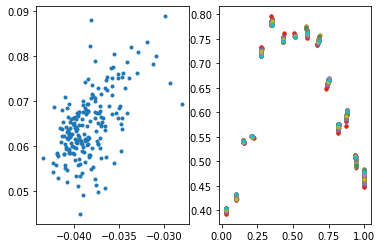

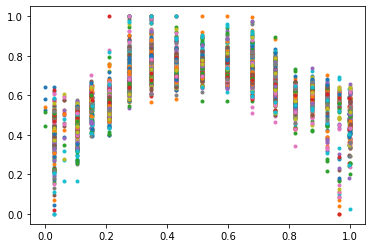

In [50]:
aefit.test_dummy(vae, qsh, batch=200, epoch=10)

In [51]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hplt.LSPlotBokeh()
p.set_model(vae)
p.set_data(qsh)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...

## Test the same with a dummy mockup

In [29]:
import Dummy_g1data as dummy

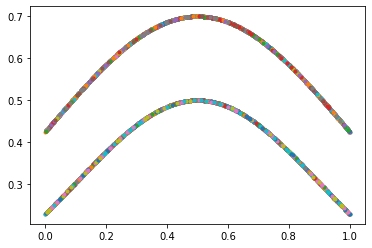

In [71]:
ds = dummy.Dummy_g1data(7000)
ds.kinds =  [
    {'mean': [0.5], 'sigma': [0.4], 'gain': [0.5]},
    {'mean': [0.5], 'sigma': [0.5], 'gain': [0.7]},    
]
dummy.test_gendata(ds)

In [125]:
d_vae = aefit.AEFIT0(latent_dim=10, feature_dim=40)

aefit 0 configured new


0-20 loss: 24.533733
0-40 loss: 24.256245
0-60 loss: 24.104748
1-80 loss: 24.260899
1-100 loss: 24.293867
1-120 loss: 24.087000
1-140 loss: 24.085478
2-160 loss: 24.202177
2-180 loss: 24.275396
2-200 loss: 24.186113
3-220 loss: 24.093138
3-240 loss: 24.225666
3-260 loss: 24.221758
3-280 loss: 24.086454
4-300 loss: 24.154392
4-320 loss: 24.110508
4-340 loss: 24.345583
5-360 loss: 24.155544
5-380 loss: 24.225822
5-400 loss: 24.165388
5-420 loss: 24.066156
6-440 loss: 24.064110
6-460 loss: 24.109957
6-480 loss: 24.114311
7-500 loss: 24.229666
7-520 loss: 24.162233
7-540 loss: 24.104509
7-560 loss: 24.052467
8-580 loss: 24.256897
8-600 loss: 24.040550
8-620 loss: 24.081203
9-640 loss: 24.237503
9-660 loss: 24.153423
9-680 loss: 24.008856
9-700 loss: 24.053179


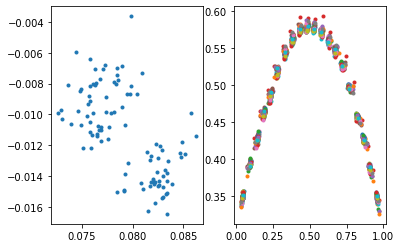

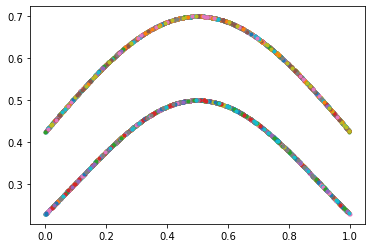

In [126]:
aefit.test_dummy(d_vae, ds, batch=100, epoch=10)

In [127]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hplt.LSPlotBokeh()
p.set_model(d_vae)
p.set_data(ds)
p.plot(notebook_url='http://172.17.0.2:8888')


Loading BokehJS ...

E0626 16:06:52.888590 140116201248576 protocol_handler.py:102] error handling message Message 'PATCH-DOC' (revision 1) content: {'events': [{'kind': 'ModelChanged', 'model': {'type': 'TextInput', 'id': '122937'}, 'attr': 'value', 'new': 'NaN,NaN'}], 'references': []}: InvalidArgumentError()
